<br> 
​
<div class="alert alert-info"><b>PROJET 10 : DETECTER DES FAUX BILLETS</b> 
​


<br> 

<div class="alert alert-warning"><b>CONTEXTE</b> 
    
    
L'Organisation nationale de lutte contre le faux-monnayge(ONCFM) a pour objectif de mettre en place des méthodes d'identification des contrefaçons des billets en euros.
    
<b>Objectif</b>: 
    
Mettre en place une modélisation qui serait capable d'identifier automatiquement les vrais des faux billets. Et ce à partir de certaines dimensions du billet et des éléments qui le composent. 
    

# IMPORTER LES LIBRAIRIES ET LES DONNEES

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import chi2_contingency,t, shapiro
import scipy.stats as st
from scipy.stats import norm

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
billet = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 10\billets.csv', sep=';')

In [3]:
billet_all = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 10\billets.csv', sep=';')
billet_2 = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 10\billets.csv', sep=';')

# Préparation des données

## Exploration des données

In [4]:
# 5 premières lignes -
billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
# 5 dernières lignes
billet.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [6]:
# 5 lignes dans le jeu de données
billet.sample(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
698,True,172.24,103.97,104.11,4.02,2.84,113.15
848,True,172.44,104.26,103.56,3.48,3.12,112.70
485,True,171.83,104.29,103.58,4.00,3.32,113.21
274,True,171.52,103.74,104.10,4.47,2.87,113.58
1298,False,172.00,104.36,104.16,4.94,3.25,111.82


In [7]:
# Informations globales sur le jeu de données
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [8]:
# taille du jeu de données
billet.shape

(1500, 7)

In [9]:
# nombre de variables par colonne
billet.count()

is_genuine      1500
diagonal        1500
height_left     1500
height_right    1500
margin_low      1463
margin_up       1500
length          1500
dtype: int64

In [10]:
# liste des colonnes
list(billet)

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [11]:
# NaNs dans le jeu de données
billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

<br>
<div class="alert alert-success">
<b>NOTE</b> 

Le fichier comporte 1500 données et 7 colonnes.

6 colonnes concernent les caractéristiques des billets et une colonne nous indique si le billet est vrai ou faux. 
    
Nous constatons 37 valeurs manquantes dans la colonne margin_low.

In [12]:
# création d'un df avec les données manquantes
df_nan = billet[billet.isnull().any(axis=1)]

# création d'un df sans les données manquantes
billet = billet.dropna(how='any')

# Visualisation des données

> Avant de traiter nos valeurs manquantes il est judicieux de visualiser nos données pour mieux les comprendre et voir s’il existe une relation entre chaque variable.

## Représentation des effectifs par type de billets

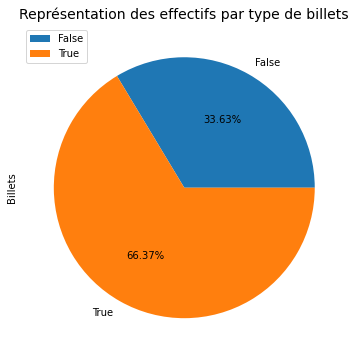

In [13]:
t = pd.crosstab(billet.is_genuine, "Billets")
t.plot.pie(subplots=True, figsize = (6, 6), autopct = lambda billet: str(round(billet,2)) + '%' )
plt.title('Représentation des effectifs par type de billets', fontsize = 14);

- 66.37% des billets sont vrais dans notre jeu de données.
- 33.63% des billets sont faux dans notre jeu de données.

## Représentation de la distribution des variables par rapport à la variable 'is_genuine'

In [14]:
billet_faux = billet[billet['is_genuine'] == False]

billet_vrai = billet[billet['is_genuine'] == True]

Répartition des données


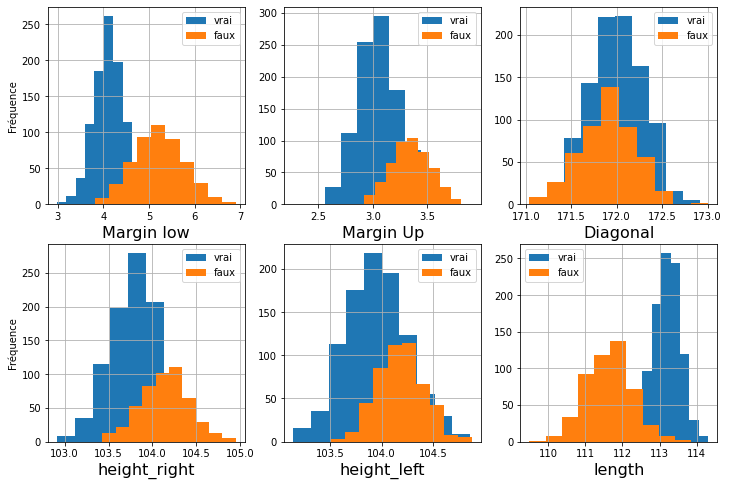

In [15]:
plt.rcParams["figure.figsize"] = [12,8]
print('Répartition des données')


labels = ['vrai', 'faux']

plt.subplot(2,3,1)
billet_vrai.margin_low.hist(label = 'vrais billets')
billet_faux.margin_low.hist(label = 'faux billets')
plt.ylabel("Fréquence", fontsize=10)  
plt.xlabel("Margin low", fontsize=16)  
plt.legend(labels)

plt.subplot(2,3,2)
billet_vrai.margin_up.hist(label = 'vrais billets')
billet_faux.margin_up.hist(label = 'faux billets')
plt.xlabel("Margin Up", fontsize=16)  
plt.legend(labels)

plt.subplot(2,3,3)
billet_vrai.diagonal.hist(label = 'vrais billets')
billet_faux.diagonal.hist(label = 'faux billets')
plt.xlabel("Diagonal", fontsize=16)  
plt.legend(labels)

plt.subplot(2,3,4)
billet_vrai.height_right.hist(label = 'vrais billets')
billet_faux.height_right.hist(label = 'faux billets')
plt.ylabel("Fréquence", fontsize=10)  
plt.xlabel("height_right", fontsize=16)  
plt.legend(labels)

plt.subplot(2,3,5)
billet_vrai.height_left.hist(label = 'vrais billets')
billet_faux.height_left.hist(label = 'faux billets')
plt.xlabel("height_left", fontsize=16)  
plt.legend(labels)


plt.subplot(2,3,6)
billet_vrai.length.hist(label = 'vrais billets')
billet_faux.length.hist(label = 'faux billets')
plt.xlabel("length", fontsize=16)  
plt.legend(labels)

plt.show()

- Les distributions de chaque variable (vrais et faux) suivent une loi normale.
- Les distributions des vrais et faux billets de la variable 'Diagonal' sont quasiment identiques. 
- Nous pouvons souligner une différence importante de distribution entre vrais et faux billets pour les variables suivantes : 'Length', 'Margin_low', Margin_up'. 

Ce sont les 3 variables qui vont certainement nous permetttre de différencier les vrais des faux billets. 

## Boxplot de la distribution des variables par rapport à la variable 'is_genuine'

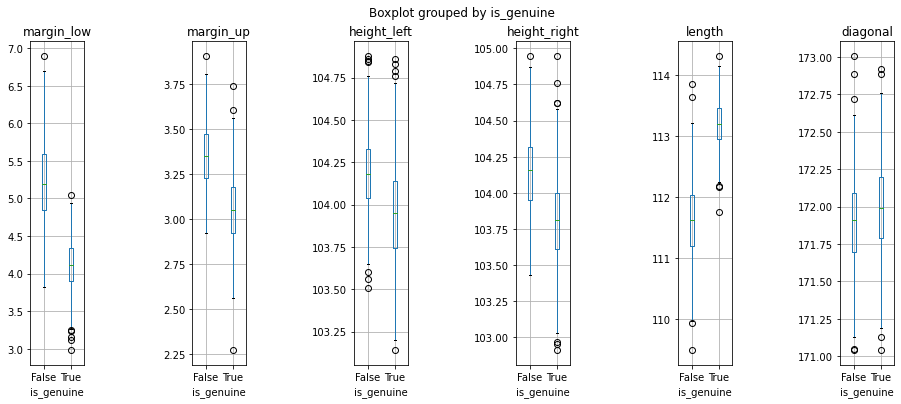

In [16]:
fig, ax = plt.subplots(1, 6, figsize=(15, 6))

# draw boxplots - for one column in each subplot
billet.boxplot('margin_low', by = 'is_genuine',  ax=ax[0])
billet.boxplot('margin_up', by = 'is_genuine', ax=ax[1])
billet.boxplot('height_left',by = 'is_genuine',  ax=ax[2])
billet.boxplot('height_right',by = 'is_genuine', ax=ax[3])
billet.boxplot('length',by = 'is_genuine', ax=ax[4])
billet.boxplot('diagonal',by = 'is_genuine', ax=ax[5])

plt.subplots_adjust(wspace=2) 

plt.show()

Les boxplots confirment l'analyse des distributions réalisée via les histogrammes : 

Les variables 'margin_low' et 'margin_up' ont des  médianes significativement plus élevées pour les faux billets.

La variable 'length' a une médiane plus faible pour les faux billet. 

Les variables 'height_left' et 'height_righ' ont des médianes légèrement plus élevées pour les faux billets.

La variable 'diagonal' n'est pas significative car très peu de différence entre la médiane des vrais et faux billets. 

<br>
<div class="alert alert-success">
<b>NOTE</b> 
    
Les faux billets ont une marge haute et une marge basse plus grande par rapport aux vrais billets.

Les faux billets sont moins longs que les vrais billets. 

## Matrice des corrélations

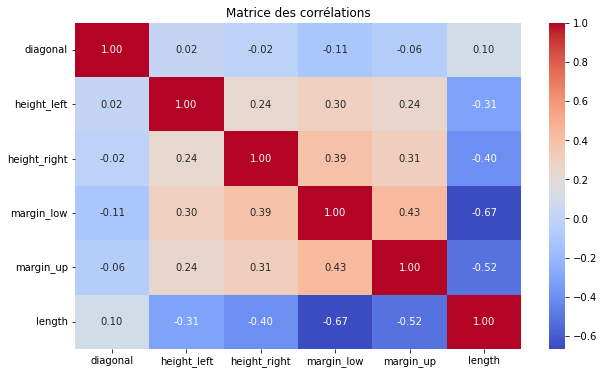

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(billet.iloc[:, 1:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice des corrélations')
plt.show()

> Constat : 

- Forte corrélation entre margin_low et length (corrélation négative)
- Moyenne corrélation entre margin_low et margin_up (corrélation positive)
- Forte corrélation entre margin_up et length (corrélation négative)

## Pairplot

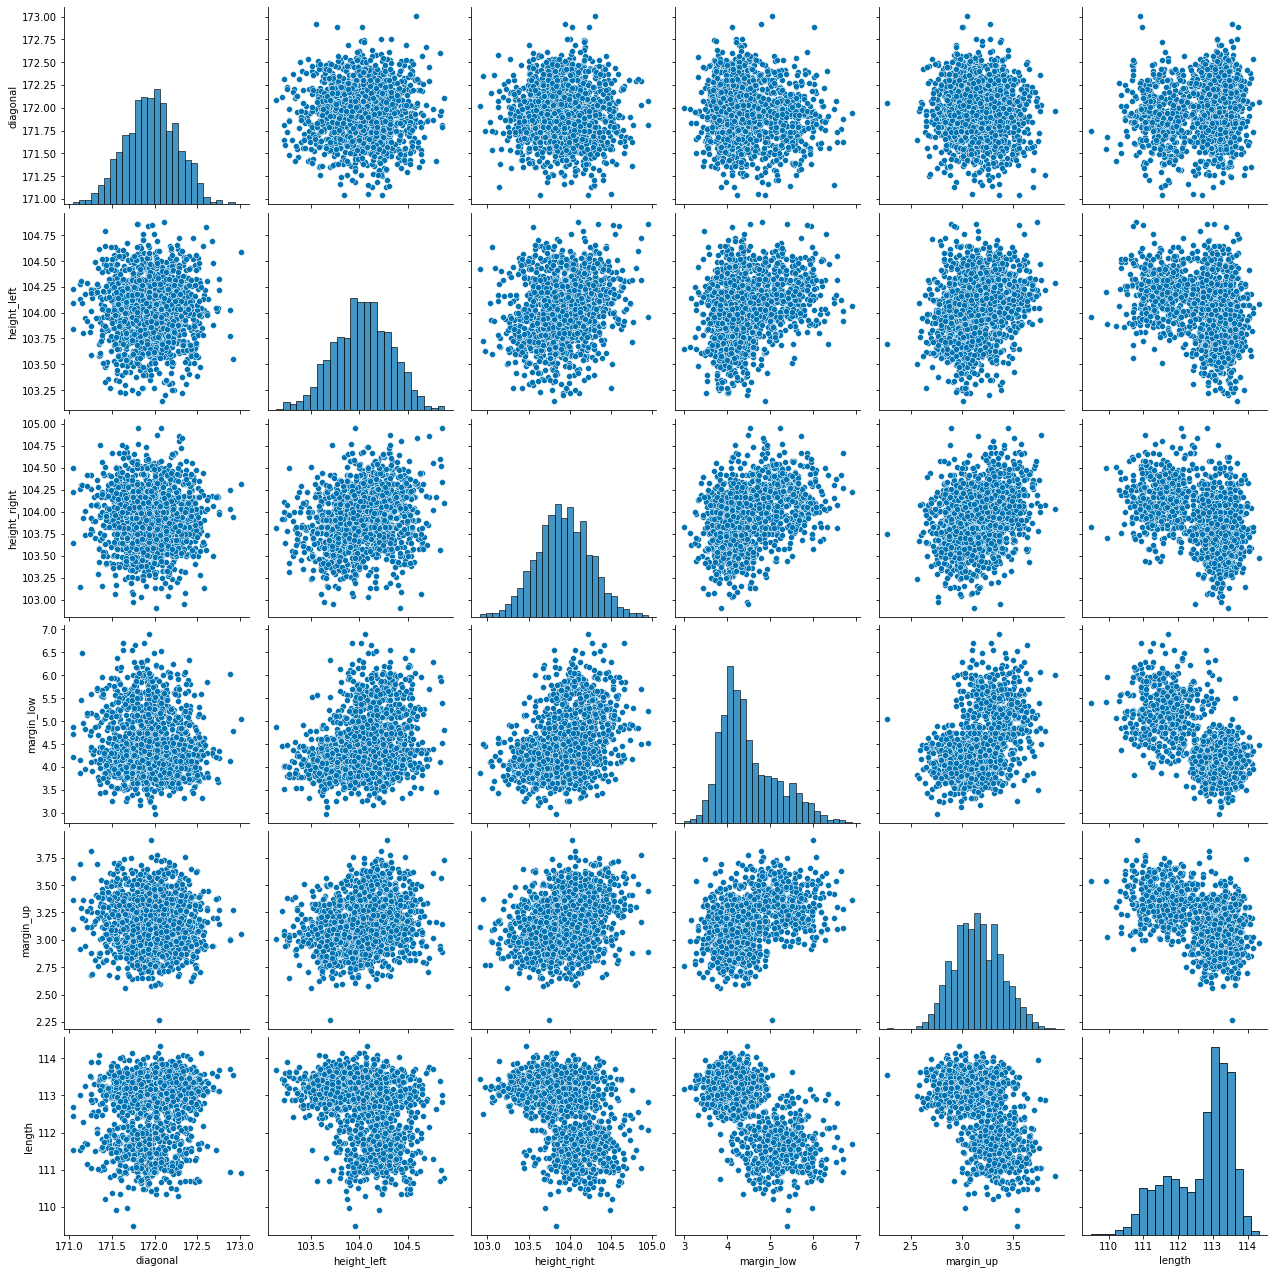

In [18]:
sns.set_palette('colorblind')
sns.pairplot(data=billet.drop('is_genuine', axis =1), height=3)

> Ce pairplot nous confirme les observations réalisées en amont : 
- les variables suivent une loi normale exceptée la variable length;
- margin_low et length sont corréleés négativement (plus la variable 'length' sera élevée et plus la variable 'margin_low' va diminuer);
- margin_up et length sont corrélées négativement également;
- margin_low et margin_up sont corréleés positivement (elles évoluent en même temps).

<br> 
​
<div class="alert alert-info"><b>PREMIERES ANALYSES</b> 
    
1 - Le jeu de données contient 1500 valeurs : 1000 vrais billets et 500 faux billets

2 - Les variables de notre jeu de données correspondent aux dimensions géométriques des billets :
    
- la longueur du billet (en mm) ;
    
- la hauteur du billet (mesurée sur le côté gauche, en mm) ;
    
- la hauteur du billet (mesurée sur le côté droit, en mm) ;
    
- la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
    
- la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
    
- la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
    
- la diagonale du billet (en mm).
    
3 - Après un premier tour d'horizon, nous pouvons contater que :
    
- le jeu de données suit une loi normale;
    
- 3 variables vont certainement permettre de différencier les vrais des faux billets ('margin_low', 'margin_up', 'length');
    
- une variable n'est pas significative dans la distinction des vrais et faux billets : 'diagonal';
    
- il manque 37 valeurs dans la colonne margin_low qu'il faut traiter.
​

## Visualisation de la variable à prédire (margin_low)

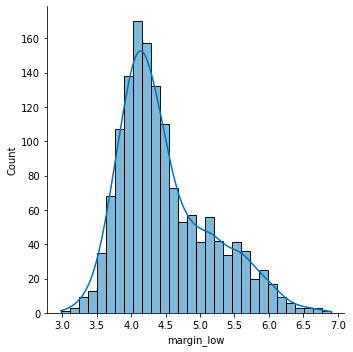

In [19]:
sns.displot(data=billet,x='margin_low', bins=30,kde=True);

> La distribution de la variable suit une loi normale (distribution Gaussienne)

<br> 
​
<div class="alert alert-danger"><b>Rappelons que la variable 'margin_low' est fortement corrélée avec la variable length (négativement) et avec la variable 'margin_up' (positivement).</b>

## Corrélation de 'margin low' avec 'margin_up' et 'length'

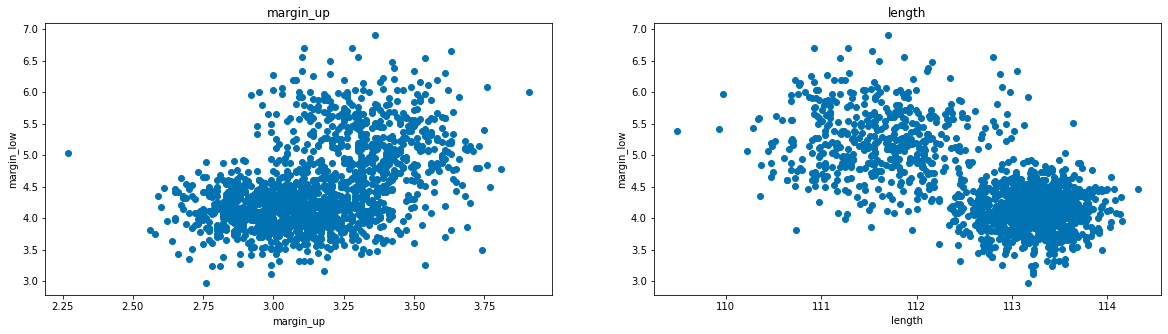

In [20]:
plt.figure(figsize=(20, 5))

features = ['margin_up', 'length']
target = billet['margin_low']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = billet[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('margin_low')

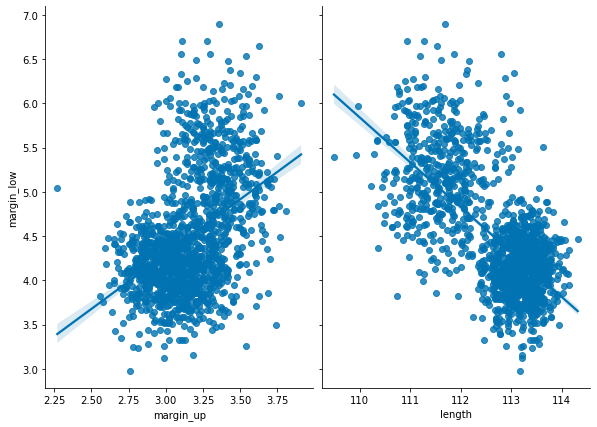

In [21]:
ax = sns.pairplot(billet, x_vars=['margin_up','length'], y_vars='margin_low', height= 6,aspect=0.7, kind='reg')
plt.show()

# Traitement des valeurs manquantes

**Objectif** : prédire les valeurs manquantes dans la colonne margin_low.

**Méthode** : Régression linéaire

## Régression linéaire multiple

In [22]:
# on remplace les valeurs True et False de la colonne is_genuine par [1,0]
df = billet.copy()
df['is_genuine'].replace([True, False], [1,0], inplace = True)
df_nan['is_genuine'].replace([True, False], [1,0], inplace = True)

df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [23]:
df_nan.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36


In [24]:
# On utilise la commande lm pour régresser margin_low en fonction des autres variables de l'échantillon

reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          4.75e-299
Time:                        18:39:10   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8668      8.316      0.345   

<br>
<div class="alert alert-success">
<b>NOTE</b> 

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.
    
Le  𝑅2  vaut environ 0.617, et le  𝑅2  ajusté est d'environ 0.615. 

## Retirer les variables non significatives - Procédure descendante (Backward)

> Nous allons maintenant retirer les variables non significatives. Nous commençons par la moins significative : length, elle a une p-valeur de 0.87.

In [25]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          2.12e-300
Time:                        18:39:10   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4247      7.873      0.308   

> Nous constatons que c'est maintenant diagonal, avec une p-valeur de 0.72, qui est la moins significative. Nous la supprimons.

In [26]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          8.76e-302
Time:                        18:39:10   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3902      5.476      0.071   

> Nous constatons que c'est au tour de la variable height_right d'être supprimée :  

In [27]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          3.63e-303
Time:                        18:39:10   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9104      4.035      0.721      

> Et pour finir, nous retirons la variable height_left :

In [28]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          1.24e-304
Time:                        18:39:11   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.0

<br>
<div class="alert alert-success">
<b>NOTE</b> 

On remarque qu'à présent, tous les paramètres sont significatifs. Quant au $R^{2}$, il vaut environ 0.617 et $R^{2}$ ajusté vaut 0.616.

*On peut donc utiliser ce modèle à des fins de prévision !*

> On crée la variable 'margin_low_pred', avec les valeurs prédites obtenues via la regression linéaire multiple.


> On crée la variable 'residus' qui est la différence entre les valeurs de 'margin_low' et margin_low_pred'.

In [29]:
df['margin_low_pred'] = round(reg_multi.predict({'is_genuine' : df['is_genuine'],
                              'margin_up' : df['margin_up']}),2)

df['residus'] = reg_multi.resid
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_pred,residus
0,1,171.81,104.86,104.95,4.52,2.89,112.83,4.15,0.369454
1,1,171.46,103.36,103.66,3.77,2.99,113.09,4.13,-0.359352
2,1,172.69,104.48,103.50,4.40,2.94,113.16,4.14,0.260051
3,1,171.36,103.91,103.94,3.62,3.01,113.51,4.13,-0.505114
4,1,171.73,104.28,103.46,4.04,3.48,112.54,4.03,0.014498


## Vérification des hypothèses de validité de la régresion linéaire

### Vérifier la colinéarité des variables

<br>
<div class="alert alert-success">
<b>NOTE</b> 

VIF (Variance Inflation Factor) signifie Facteur d'Inflation de la Variance. 
    
Au cours de l'analyse de régression, le VIF évalue si les facteurs sont corrélés les uns aux autres (multi-colinéarité), ce qui pourrait influencer les autres facteurs et réduire la fiabilité du modèle.
    
Si un VIF est supérieur à 10, nous avons une multi-colinéarité élevée : la variation semblera plus grande et le facteur apparaîtra plus influent qu'il ne l'est. 
    
Si le VIF est plus proche de 1, alors le modèle est beaucoup plus robuste, car les facteurs ne sont pas influencés par la corrélation avec d'autres facteurs.

In [30]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007746]

In [31]:
# Instanciation:
reg_li_col = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length + is_genuine", 
                   data = df)
# Calculs:
res_li_col = reg_li_col.fit()

variables = res_li_col.model.exog


for VIF in [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]:
    if VIF <= 10:
        print("VIF > 10 : Pas de problème de colinéarité")

VIF > 10 : Pas de problème de colinéarité
VIF > 10 : Pas de problème de colinéarité
VIF > 10 : Pas de problème de colinéarité
VIF > 10 : Pas de problème de colinéarité
VIF > 10 : Pas de problème de colinéarité
VIF > 10 : Pas de problème de colinéarité


In [32]:
variables = res_li_col.model.exog
VIF = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
pd.DataFrame(VIF, df.drop(['margin_low', 'margin_low_pred','residus'], axis=1).columns.tolist()).rename(columns={0:'VIF'})

,VIF
is_genuine,1.028199
diagonal,1.173711
height_left,1.320836
height_right,1.596090
margin_up,3.613255
length,4.725732


> Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### Tester l'homoscédasticité

L'homoscédasticité est une caractéristique d'un modèle de régression linéaire qui implique que la variance des erreurs est constante dans le temps.

Nous allons tester la constance de la variance des résidus.

In [33]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.7074833680067386e-33


La p-value ici est inférieure à 5%, on rejette l'hypothèse H0 : les variances ne sont pas constantes (homoscédastiques).

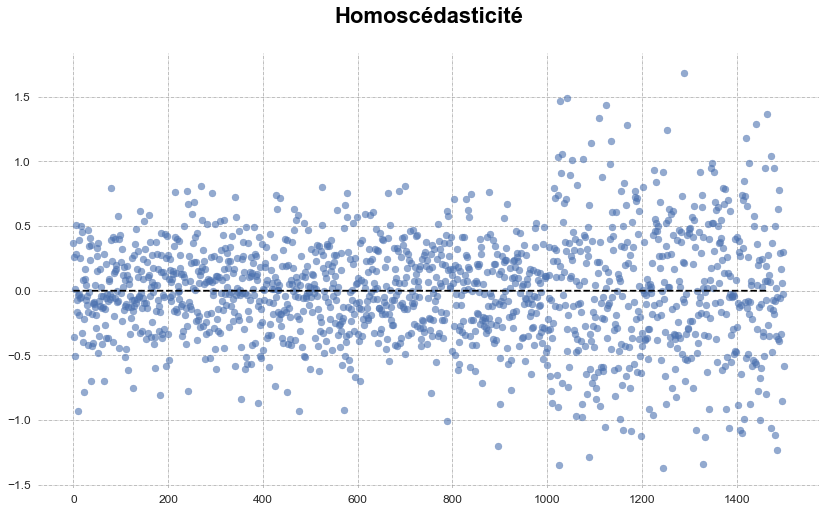

In [34]:
# Graphique:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (14,8))
ax.set_title("Homoscédasticité",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.scatter(x = df.index, y = df["residus"], alpha=0.6)
plt.plot(np.repeat(0, len(df.index)+2), color="black", linestyle='--')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

### Tester la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

**Rappel**

HO : Les résidus suivent une loi normale

H1 : Les résidus ne suivent pas une loi normale

In [35]:
stat, p = shapiro(reg_multi.resid)

print('Statistics=%.3f, p=%.12f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne peut pas rejeter H0 pour des niveaux de test de 5%')
else:
    print('H0 est rejetée pour des niveaux de test de 5%')

#shapiro(reg_multi.resid)

Statistics=0.994, p=0.000006209428
H0 est rejetée pour des niveaux de test de 5%


Ici, l'hypothèse de normalité est remise en cause (p-value < 0.05), on rejette HO, les résidus ne suivent pas une loi normale. 



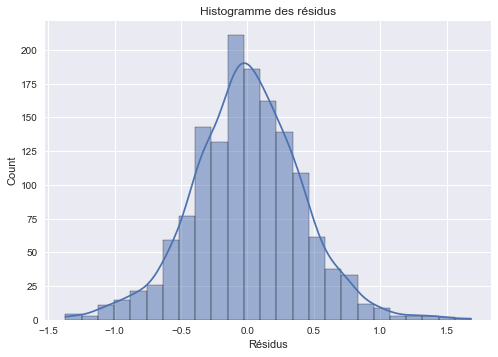

In [36]:
sns.histplot(reg_multi.resid, bins = 25, kde = True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus');

<br>
<div class="alert alert-success">
<b>NOTE</b> 


Il est nécessaire de rappeler que même si toutes les hypothèses du modèle linéaire ne sont pas respectées, celui-ci étant robuste (surtout dans notre cas où la taille de l'échantilllon est supérieure à 30 individus), les résultats du modèle linéaire restent valables. 

Nous avons découvert que les résidus ne sont ni gaussiens ni homoscédastiques mais l'application du modèle linéaire n'exige pas un respect exact des hypothèses mais un respect approximatif ce qui est le cas dans ce projet. 

In [37]:
billet['is_genuine'].replace([True, False], [1,0], inplace = True)

In [38]:
billet_all['is_genuine'].replace([True, False], [1,0], inplace = True)

In [39]:
billet_all.loc[billet_all["margin_low"].isnull(), "margin_low"] = round(reg_multi.predict({'is_genuine' : billet_all['is_genuine'],
                              'margin_up' : billet_all['margin_up']}),2)

billet_all

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [40]:
billet_all.shape

(1500, 7)

In [41]:
billet_all.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<br> 

<div class="alert alert-warning"><b>ON FAIT LE POINT</b> 

Nous avons réalisé une première analyse exploratoire qui nous a permis de découvrir quelles variables étaient corrélées et étaient susceptibles de nous permettre de distinguer les vrais des faux billets (margin_low, margin_up, length).

Nous avons réalisé une régression linéaire pour prédire les données manquantes de la variable margin_low et nous les avons imputées.

Nous allons maintenant réaliser une Analyse en Composante Principale pour réduire nos variables et représenter nos individus dans un espace à deux dimensions.

# ACP

In [42]:
X = billet_all.copy()
X.set_index('is_genuine', inplace = True)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Enregistrement des noms des billets (vrai ou faux) dans une variable 'names'
names = X.index

# Enregistrement des colonnes dans 'features'
features = X.columns

# On instancie
scaler = StandardScaler()

# On fit et on transforme
X_scaled = scaler.fit_transform(X)


# On espère avoir une moyenne à 0 et un écart type à 1 : 

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [44]:
pd.DataFrame(X_scaled, index=X.index,columns=X.columns).head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
1,-0.486540,2.774123,3.163240,0.056284,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.080708,-0.696799,0.471666
1,2.397823,1.504756,-1.291191,-0.125635,-0.912562,0.551901
1,-1.961498,-0.399294,0.060498,-1.308106,-0.610494,0.953075
1,-0.748754,0.836669,-1.414072,-0.671391,1.417677,-0.158750


In [45]:
# On instancie notre ACP
pca = PCA()

# On l'entraine sur les données scalées
pca.fit(X_scaled)

PCA()

In [46]:
pca.explained_variance_ratio_

array([0.43204615, 0.16957139, 0.130199  , 0.11825181, 0.09667101,
       0.05326065])

In [47]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.2 , 16.96, 13.02, 11.83,  9.67,  5.33])

In [48]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

In [49]:
x_list = range(6)
list(x_list)

[0, 1, 2, 3, 4, 5]

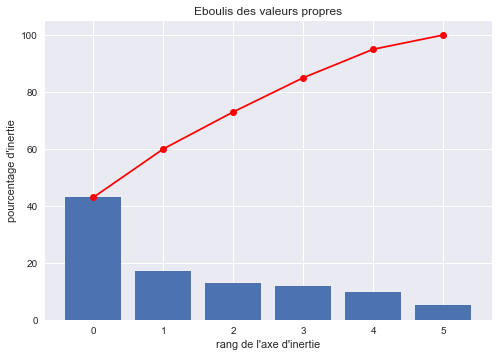

In [50]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [51]:
n_components = 4
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=4)

In [52]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084841,0.331337,0.393762,0.506580,0.439317,-0.527585
1,0.941306,0.307252,0.108598,-0.073165,-0.004426,0.048705
2,-0.287022,0.884790,-0.165738,-0.106968,-0.270951,0.149800
3,-0.102828,-0.047599,0.866850,-0.091397,-0.442679,0.177239


In [53]:
X_proj = pca.transform(X_scaled)
X_proj[:10]

array([[ 1.64721654e+00,  7.47227687e-01,  2.39560692e+00,
         3.18515800e+00],
       [-2.01974380e+00, -2.20673545e+00, -1.00235609e+00,
         7.20876568e-02],
       [-9.68997225e-01,  2.61931623e+00,  1.20053710e+00,
        -9.24182858e-01],
       [-1.37575329e+00, -1.81765506e+00,  6.47785185e-01,
         8.31877575e-01],
       [ 1.50386746e-01, -5.66189636e-01,  8.53465216e-01,
        -1.78297059e+00],
       [-6.95869595e-01,  4.27002394e-01, -8.67735411e-01,
         8.20289273e-01],
       [ 1.76197372e-01,  1.30270168e+00,  1.49074841e-03,
        -5.33808252e-01],
       [-1.15114509e+00, -3.82759583e-01, -3.83013344e-01,
         1.08797459e+00],
       [-8.54029515e-01,  1.44364402e+00, -6.85000068e-01,
        -9.08027334e-01],
       [-5.96747820e-01,  1.74342231e+00, -3.23330210e-01,
         1.16515903e-01]])

In [54]:
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", "F3", "F4"])
X_proj[:10]

,F1,F2,F3,F4
0,1.647217,0.747228,2.395607,3.185158
1,-2.019744,-2.206735,-1.002356,0.072088
2,-0.968997,2.619316,1.200537,-0.924183
3,-1.375753,-1.817655,0.647785,0.831878
4,0.150387,-0.566190,0.853465,-1.782971
5,-0.695870,0.427002,-0.867735,0.820289
6,0.176197,1.302702,0.001491,-0.533808
7,-1.151145,-0.382760,-0.383013,1.087975
8,-0.854030,1.443644,-0.685000,-0.908027
9,-0.596748,1.743422,-0.323330,0.116516


In [55]:
x_list = range(1, n_components+1)
list(x_list)

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05
F3,-0.29,0.88,-0.17,-0.11,-0.27,0.15
F4,-0.10,-0.05,0.87,-0.09,-0.44,0.18


In [56]:
x, y = 0,1

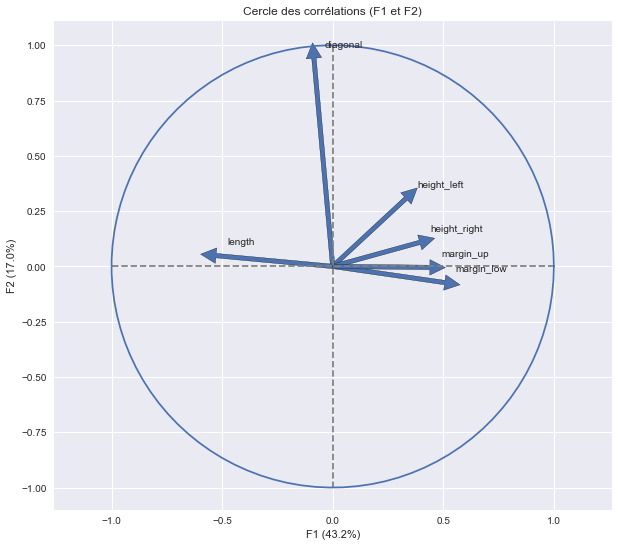

In [57]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

<br>
<div class="alert alert-success">
<b>NOTE</b> 

Les variables les plus corrélées à F1 sont margin_up et margin_low. 
    
Elles sont corrélées négativement à la variable length : au plus les valeurs de la variable length augmentent, au plus les valeurs des variables margin_low et margin_up diminuent. 
    
La variable height_right est également corrélée à F1 alors que height_left  n'est ni corrélée à F1 et F2.
    
La variable diagonal est fortement corrélée à F2 et, comme constaté en amont,  elle n'est pas significative.
    

In [58]:
labels = billet_all.is_genuine 

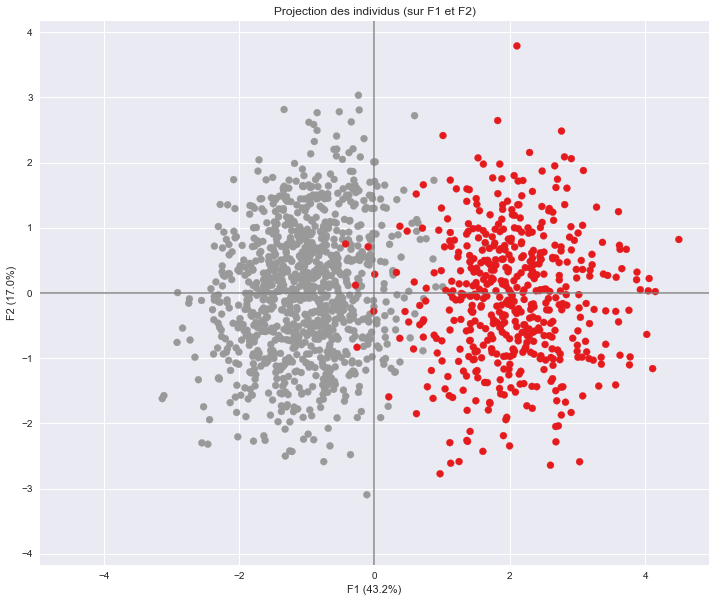

In [59]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

#Transforme notre DataFrame d'origine
X_ = np.array(X_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

# valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1

# affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

# on borne x et y 
ax.set_xlim(left= -x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# un titre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1) )
plt.show()

<br>
<div class="alert alert-success">
<b>NOTE</b> 

> Suite à l'ACP et à la projection des individus nous pouvons constater que les faux billets se trouvent en grande majorité du côté des variables margin_low et margin_up alors que les vrais billets se trouvent à gauche de notre projection, du côté de la variable length. 

Ce sont les 3 variables qui montraient des différences importantes entre les vrais et faux billets. 


Les variables qui permettent d'expliquer les différences entre les vrais et les faux billets sont : 

- margin_low
- margin_up
- length

<br> 

<div class="alert alert-warning"><b>  <b>
    
Analysons les corrélations entre ces 3 variables. 

## Corrélation entre margin_low et margin_up (tous les billets)

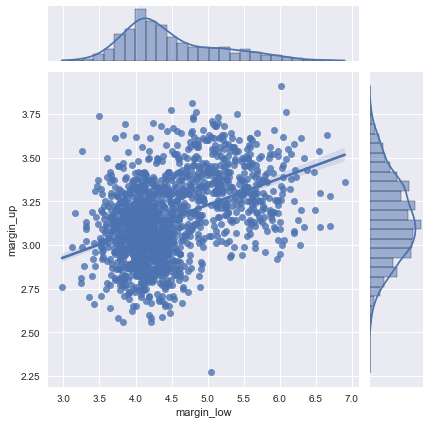

In [60]:
sns.jointplot(x = 'margin_low', y = 'margin_up', data = billet_all, kind = "reg");

> Ici on peut parler de **corrélation positive** : les points sont regroupés et partent du coin inférieur gauche et se dirigent en haut à droite.


> Les points sont rapprochés autour de la droite de régression ce qui explique également une forte corrélation. 

> Les distributions suivent une loi normale.

## Corrélation entre margin_low et margin_up (entre vrais et faux billets)

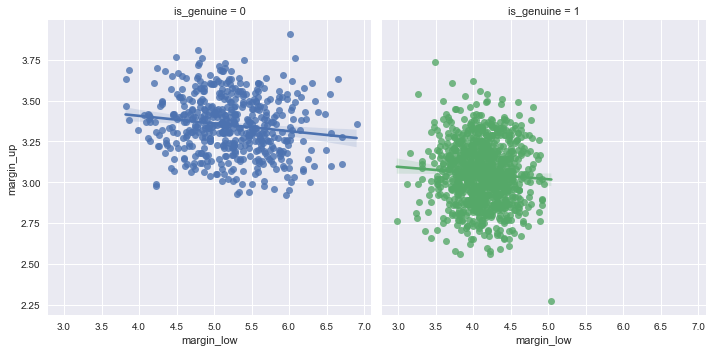

In [61]:
sns.lmplot(x = 'margin_low', y =  'margin_up',  col = 'is_genuine', hue = "is_genuine", data = billet_all);


> Nous pouvons constater que les variables margin_low et margin_up des vrais billets sont TRES corrélées contrairement aux faux billets qui ne le sont que moyennement (les individus sont éparpillés).

## Corrélation entre margin_low et length (tous les billets)

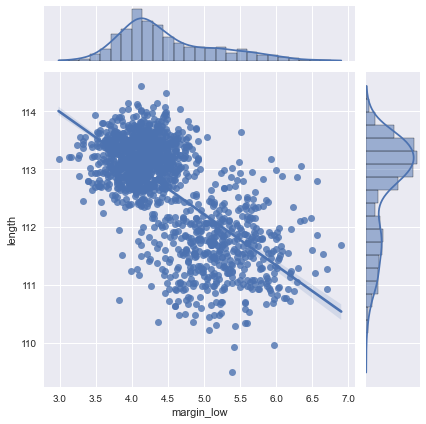

In [62]:
sns.jointplot(x = 'margin_low', y = 'length', data = billet_all, kind = "reg");

> Ce graphique nous confirme ce que nous avons pu détecter précedemment lors de la réalisation de l'ACP et de la projection des individus à savoir que les variables margin_low et length sont corrélées négativement (quand l'une augmente, l'autre diminue). 

## Corrélation entre margin_low et length (entre vrais et faux billets)

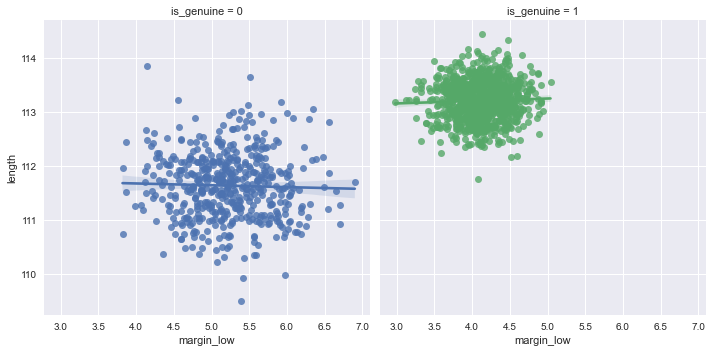

In [63]:
sns.lmplot(x = 'margin_low', y =  'length',  col = 'is_genuine', hue = "is_genuine", data = billet_all);

> Même constat que pour margin_low et margin_up, les variables des vrais billets sont très corrélées et resserées autour de la droite de régression contrairement aux données des faux billets. 
    

## Corrélation entre margin_up et length

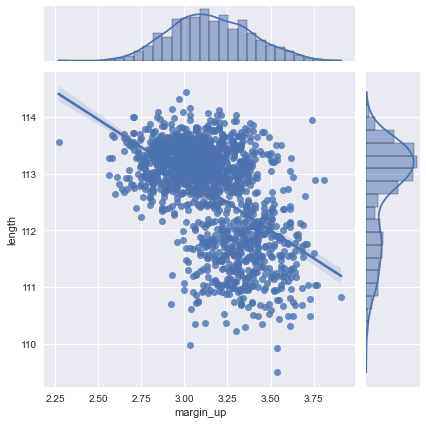

In [64]:
sns.jointplot(x = 'margin_up', y = 'length', data = billet_all, kind = "reg");

> Margin_up et et length ont une corrélation négative : elles évoluent en sens inverse.

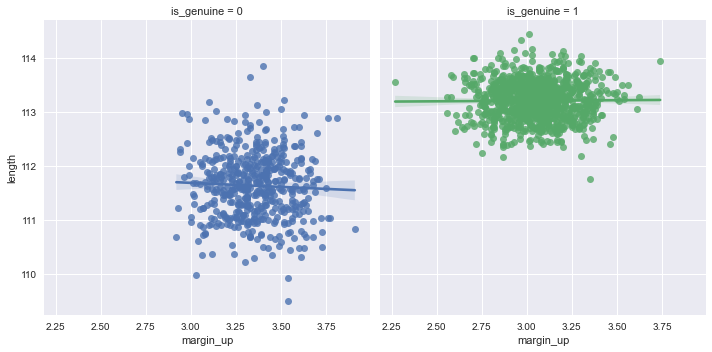

In [65]:
sns.lmplot(x = 'margin_up', y =  'length',  col = 'is_genuine', hue = "is_genuine", data = billet_all);

<br>
<div class="alert alert-success">
<b>NOTE</b> 
    
Les 3 variables corrélées (margin_low, margin_up et length) nous révelent la même chose à savoir que les valeurs des vrais billets sont fortement corrélées entre elles contrairement aux valeurs des faux billets.

# K-MEANS

<br> 

<div class="alert alert-warning">  

<b>OBJECTIF</b> 

Classer un ensemble de données dans un nombre de clusters, défini par la lettre « k« , qui est fixé au préalable.

<b>METHODE</b> 

- Détermination de la valeur K (le nombre de clusters optimal) via la méthode du coude (Elbow method)
- Application de l’algorithme de K Means
- Analyse des Clusters
</div>

## Nombre optimal de clusters

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = billet_all.drop('is_genuine', axis= 1).copy()
y = billet_all.is_genuine.copy()

In [68]:
# on instancie

scaler = StandardScaler()

# On fit et on transforme
X_scaled = scaler.fit_transform(X)

### Méthode du coude (Elbow Method)

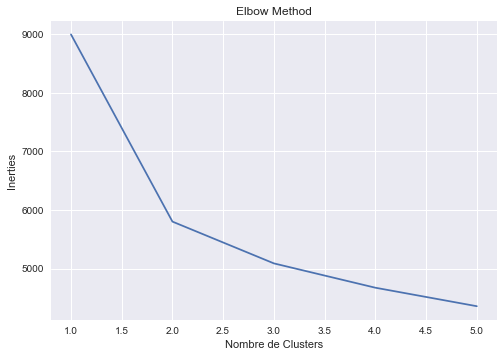

In [69]:
from sklearn.cluster import KMeans
wcss = []
mapping1 = {}
for i in range(1,6):
    km=KMeans(n_clusters=i)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    mapping1[i] = km.inertia_
plt.plot(range(1,6),wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inerties')
plt.show()


> Avec la méthode du coude nous pouvons définir 2 clusters.

### Méthode Silhouette score

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.34346169166680707)
For n_clusters = 3, silhouette score is 0.20975545225191908)
For n_clusters = 4, silhouette score is 0.19702718598196164)
For n_clusters = 5, silhouette score is 0.15665439437091894)
For n_clusters = 6, silhouette score is 0.1492199662968838)
For n_clusters = 7, silhouette score is 0.1452815889126192)
For n_clusters = 8, silhouette score is 0.14590371575213512)
For n_clusters = 9, silhouette score is 0.13763307081855805)


> Avec la méthode du silhouette score, nous pouvons définir que le nombre optimal de cluster est 2.

##  Clusters K-Means

In [71]:
kmeans = KMeans(n_clusters=2, random_state = 1) 
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=1)

In [104]:
cluster = pd.DataFrame({'cluster' : kmeans.labels_})
df_cluster = billet_all.join(cluster)
df_cluster

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,0
1,1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,1
3,1,171.36,103.91,103.94,3.62,3.01,113.51,1
4,1,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,0


## Visualisation des clusters 

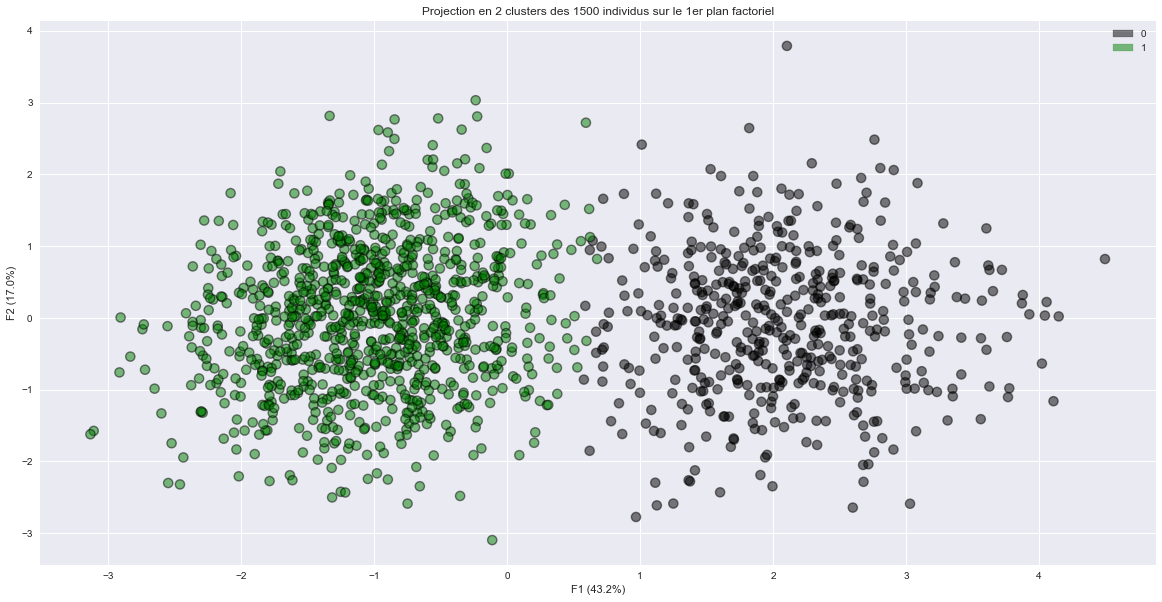

In [106]:
import matplotlib.patches as mpatches


#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))


colors = ['black', 'green']

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df_cluster['cluster'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)



lab_0 = mpatches.Patch(color='black', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='green', alpha=0.5, label='1')


plt.legend(handles=[lab_0, lab_1])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 2 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

#plt.savefig("p6_graphic/projection_kmeans.png")
plt.show()

In [74]:
df_cluster['is_genuine'].replace([1,0], [True, False], inplace = True)

## Matrice de confusion

La matrice de confusion est un résumé des résultats de prédiction pour un problème particulier de classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle.

In [75]:
matrice = pd.crosstab(df_cluster['cluster'],df_cluster['is_genuine'],margins=True,margins_name = 'Total')
matrice_confusion =  pd.crosstab(df_cluster['cluster'],df_cluster['is_genuine'])
matrice
# cluster 0 = faux billets
# cluster 1 = vrais billets

is_genuine,False,True,Total
cluster,,,
0,486,10,496
1,14,990,1004
Total,500,1000,1500


### Représentation graphique de la matrice de confusion

In [76]:
matrice_confusion

is_genuine,False,True
cluster,,
0,486,10
1,14,990


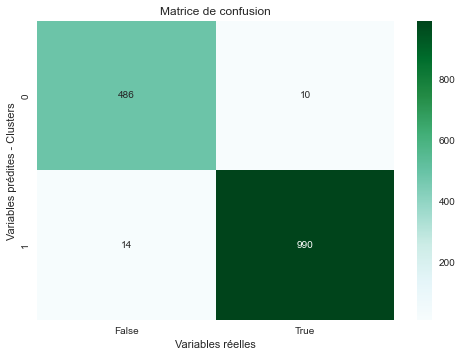

In [77]:
sns.heatmap(pd.DataFrame(matrice_confusion), annot=True, cmap="BuGn" ,fmt='g')

plt.title('Matrice de confusion')
plt.xlabel('Variables réelles')
plt.ylabel('Variables prédites - Clusters')
plt.show()

> Selon la classification K-MEANS, le groupe 0 semble correspondre aux faux billets et le groupe 1 semble correspondre aux vrais billets.

> Parmi nos variables actuelles de faux billets, la méthode de classification K-MEANS détecte 486 'vrais' faux billets et 14 'faux' vrais billets.

> Parmi nos variables actuelles de vrais billets, la méthode de classification K-MEANS détecte 990 'vrais' vrais billets et 14 'faux' vrais billets. 

> 14 faux billets sont détectés comme des vrais billets et 10 vrais billets sont détectés comme des faux billets. 

### Report Classification

Lorsqu’il est question de classifications le choix des métriques utilisées pour évaluer un modèle est primordial. 
Voici quelques unes des métriques :

**Précision** : c’est la métrique la plus simple, il s’agit simplement de la proportion de prédictions correctes parmi toutes les prédictions faites par le modèle.

**Recall** : le recall est initialement une métrique utilisée pour des classifications binaires correspond à la proportion de prédictions positive lorsqu’on s’attend à ce que le résultat soit positif.

**F1-Score** : le F1-Score est une combinaison des deux métriques précédente, il est souvent utilisé dans les papiers de recherches pour comparer les performances entre deux classifieurs.


In [78]:
df_cluster_2 = df_cluster.copy()

df_cluster_2['is_genuine'].replace( [True, False],[1,0], inplace = True)

In [79]:
reel = df_cluster_2.is_genuine
prediction = kmeans.labels_

In [80]:
from sklearn.metrics import classification_report

print(classification_report(reel,prediction))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       500
           1       0.99      0.99      0.99      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



> 98% de classifications correctes parmi les clasifications faites par le modèle pour le cluster 0 (faux billets).

> 99% de classifications correctes parmi les classifications faites par le modèle pour le cluster 1 (vrais billets).

Il est possible d’évaluer la cohérence entre les groupes de départ et le partitionnement trouvé par K-means en utilisant l’indice de Rand ajusté. 

In [81]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(reel,prediction)

0.9361771423949447

In [82]:
print('La performance de classification de notre modèle est de', round(metrics.accuracy_score(reel, prediction)*100,2),'%.')

La performance de classification de notre modèle est de 98.4 %.


# Régression logistique

In [83]:
from sklearn.linear_model import LogisticRegression


# données entraînements et données tests

X = billet_all.drop('is_genuine', axis =1).copy()
y = billet_all.is_genuine.copy()

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

In [85]:
X_train.shape

(1200, 6)

In [86]:
X_test.shape

(300, 6)

## Prédictions

In [87]:
reg_logistique = LogisticRegression(random_state = 1)
reg_logistique.fit(X_train, Y_train)

y_pred = reg_logistique.predict(X_test) 

## Matrice de confusion Régression logistique

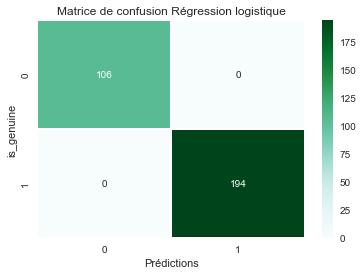

In [88]:
plt.figure(figsize=(6,4))
matrice_confusion_reg_log = pd.crosstab( Y_test, y_pred)
sns.heatmap(matrice_confusion_reg_log, annot = True, cmap="BuGn",fmt = ".3g", linewidths = 0.3)
plt.xlabel("Prédictions")
plt.title("Matrice de confusion Régression logistique")
plt.show()


> Vrais positifs = 205 vrais billets sont détectés comme vrais. 

> Vrais négatifs = 93 faux billets sont détectés comme faux. 

> Faux positif = 1 vrai billet est détecté comme faux.

> Faux négatif = 1 faux billet est détecté comme vrai.

## Accuracy score (score de précision)

In [89]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       194

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [90]:
print('La performance de prédiction de notre modèle est de', round(metrics.accuracy_score(Y_test, y_pred)*100,2),'%.')

La performance de prédiction de notre modèle est de 100.0 %.


## Coefficient de détermination R2

Si R2=1: toute la variation est expliquée par le modèle.

Si R2=0: aucune variation n'est expliquée par le modèle.

In [91]:
# print('Train score: ',  round(reg_logistique.score(X_train,Y_train),2))
print('Test score: ',  round(reg_logistique.score(X_test,Y_test),2))

Test score:  1.0


In [92]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("La performance de prédiction de notre modèle sur toutes les données tests est de  {}.".format(round(accuracy_score(Y_test, y_pred)), 4))
print("La précision de prédiction de notre modèle sur toutes les données tests est de  {}.".format(round(precision_score(Y_test, y_pred)), 4))
print("Le recall score de notre modèle sur toutes les données tests est de  {}.".format(round(recall_score(Y_test, y_pred)), 4))


La performance de prédiction de notre modèle sur toutes les données tests est de  1.
La précision de prédiction de notre modèle sur toutes les données tests est de  1.
Le recall score de notre modèle sur toutes les données tests est de  1.


## Courbe ROC

La courbe ROC est une mesure de la performance d’un classificateur binaire. On représente la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs en fonction du taux de faux positifs.

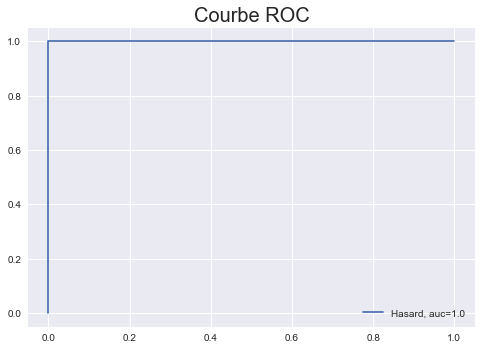

In [93]:
#ROC curve
y_pred_proba = reg_logistique.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
x = [0,1]
y = [0,1]
plt.plot(fpr,tpr,label="Hasard, auc="+str(auc))
plt.legend(loc=4)
plt.title('Courbe ROC', fontsize=20)
ax.set_ylabel('Taux Vraix Positifs', fontsize=14)
ax.set_xlabel('Taux Faux Positifs', fontsize=14)
plt.show()

In [94]:
print("AUC :",auc)


AUC : 1.0


AUC = 1 (Classificateur parfait, dans le meilleur des cas)

AUC = 0.5 (Classificateur inutile, dans le pire des cas)

Notre AUC = 0.9999

Comme avec les metrics calculées plus haut, on retombe sur un modèle quasiment parfait avec une aire sous la courbe approximée à 1.

<br>
<div class="alert alert-success">
<b>CONCLUSION METHODES DE PREDICTIONS</b> 

Nous avons essayé deux méthodes de prédiction : le K-MEANS et la régression logistique.

Les deux méthodes nous donnent d'excellents résultats.

La performance de prédiction de notre modèle K-MEANS est de 98.4 % et la performance de prédiction de notre modèle  avec la régression logistique est de 99 %.

La performance de prédiction est supérieurer avec la régression logistique, nous utliiserons ce modèle pour identifier les vrais des faux billets.


## Application du modèle aux données tests (fichier 'billets_production)

In [95]:
# On importe le fichier à tester
billets_prod = pd.read_csv(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 10\billets_production.csv')
billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [96]:
# On crée un DF sans l'id
billets_prod_val = billets_prod.drop('id', axis = 1)
billets_prod_val

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [97]:
# On identifie les vrais des faux billets avec le modèle de regression logistique et on affiche la probabilité 

pred_billets_prod = reg_logistique.predict(billets_prod_val)
proba_billets_prod = reg_logistique.predict_proba(billets_prod_val).round(3)[:, 1]
print(pred_billets_prod)
print(proba_billets_prod)

[0 0 0 1 1]
[0.005 0.001 0.001 0.911 1.   ]


In [98]:
# On ajoute la prédiction et la probabilité sur le fichier importé 
billets_prod['Prediction'] = pred_billets_prod
billets_prod['Probabilité'] = proba_billets_prod
billets_prod['Prediction'].replace( [1,0],[True, False], inplace = True)
billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Prediction,Probabilité
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.005
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.001
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.001
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.911
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,1.000


In [99]:
# On crée un df avec uniquement l'ID, la prédiction et la probabilité
df_prediction = billets_prod[['id', 'Prediction', 'Probabilité']].set_index("id")
df_prediction

,Prediction,Probabilité
id,,
A_1,False,0.005
A_2,False,0.001
A_3,False,0.001
A_4,True,0.911
A_5,True,1.000


## Détection des faux billets avec une fonction 

In [110]:
def detection_billet(fichier):
    # on importe le fichier
    df_test = pd.read_csv(fichier)
   
    # on crée un df sans id
    df_value = df_test.drop('id', axis=1)
    
    #Variable avec les prédictions - Regression logistique
    pred = reg_logistique.predict(df_value)
    
    # Variable avec les probabilités de la RL
    proba_pred = reg_logistique.predict_proba(df_value).round(3)[:, 1]
    
    # On ajoute à notre DF test les données de prédictions et de probabilités
    df_test['Prediction'] = pred
    df_test['Prediction'].replace( [1,0],['Vrai', 'Faux'], inplace = True)
    
    df_test['Probabilité'] = proba_pred
    
    # On crée un DF avec uniquement l'ID, les prédictions et les probabilités
    
    df_test_final = df_test[['id', 'Prediction', 'Probabilité']].set_index('id')
    #return df_test_final
    return df_test


In [111]:
detection_billet(r'C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\PROJETS OCR\PROJET 10\billets_production.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Prediction,Probabilité
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux,0.005
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux,0.001
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux,0.001
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,Vrai,0.911
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,Vrai,1.000
